In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps
from config import gkey

In [2]:
gmaps.configure(api_key=gkey)

In [3]:
airbnb_csv = "AB_NYC_2019.csv"

In [4]:
airbnb_df = pd.read_csv(airbnb_csv)

In [5]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
neigh_grp = airbnb_df["neighbourhood_group"]
price = airbnb_df["price"]
neigh = airbnb_df["neighbourhood"]
lat = airbnb_df["latitude"]
long = airbnb_df["longitude"]
df_airbnb_data = pd.DataFrame({"neighbourhood_group" : neigh_grp, "price": price , "neighbourhood" : neigh,"latitude":lat,"longitude":long})
df_airbnb_data.head()

,neighbourhood_group,price,neighbourhood,latitude,longitude
0,Brooklyn,149,Kensington,40.64749,-73.97237
1,Manhattan,225,Midtown,40.75362,-73.98377
2,Manhattan,150,Harlem,40.80902,-73.94190
3,Brooklyn,89,Clinton Hill,40.68514,-73.95976
4,Manhattan,80,East Harlem,40.79851,-73.94399


In [7]:
avg_neigh_grp_price = df_airbnb_data.groupby(["neighbourhood_group"]).mean()
df_avg_neigh_grp_price = avg_neigh_grp_price.reset_index()
# Dataset to show average price of each neighbourhood group
df = df_avg_neigh_grp_price.rename(columns = {"neighbourhood_group":"Neighbourhood Group","price":"Average Price"})
df_final_avgprice = df.drop(['latitude', 'longitude'], axis=1)
df_final_avgprice

,Neighbourhood Group,Average Price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


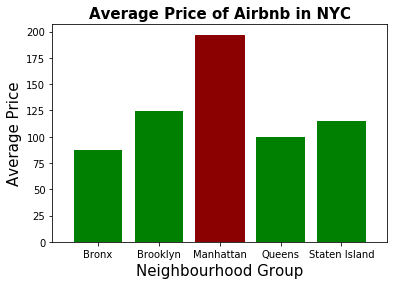

In [8]:
new_price = df_avg_neigh_grp_price["price"]
new_neigh_grp = df_avg_neigh_grp_price["neighbourhood_group"]

# Bar graph to show average prices of each neighbourhood group
x_axis = np.arange(len(new_price))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, new_neigh_grp)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(new_price)+ 10)

plt.title("Average Price of Airbnb in NYC",fontsize = 15, weight = 'bold')
plt.xlabel("Neighbourhood Group", fontsize = 15)
plt.ylabel("Average Price", fontsize = 15)


barplot = plt.bar(x_axis, new_price, color="green", align="center")
barplot[2].set_color('darkred')

plt.savefig("AveragePriceBarChart.png")
plt.show()

In [9]:
df_bronx = df_airbnb_data.loc[df_airbnb_data["neighbourhood_group"] == "Bronx"]
df_brooklyn = df_airbnb_data.loc[df_airbnb_data["neighbourhood_group"] == "Brooklyn"]
df_manhattan = df_airbnb_data.loc[df_airbnb_data["neighbourhood_group"] == "Manhattan"]
df_queens = df_airbnb_data.loc[df_airbnb_data["neighbourhood_group"] == "Queens"]
df_statenisland = df_airbnb_data.loc[df_airbnb_data["neighbourhood_group"] == "Staten Island"]

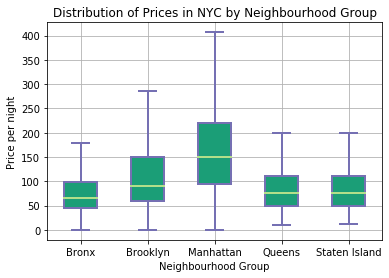

In [10]:
bronx_price = df_bronx["price"]
brooklyn_price =df_brooklyn["price"]
manhattan_price =df_manhattan["price"]
queens_price =df_queens["price"]
staten_price =df_statenisland["price"]


box_plot_data= [bronx_price,brooklyn_price,manhattan_price,queens_price,staten_price]
bp = plt.boxplot(box_plot_data,labels=['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],sym="",patch_artist=True)
for box in bp['boxes']:
    box.set( color='#7570b3', linewidth=2)
    box.set( facecolor = '#1b9e77' )
    
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)
    
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)
    
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)
    
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.title("Distribution of Prices in NYC by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price per night")
plt.savefig('DistributionofPriceNYC.png',dpi =100)
plt.grid()
plt.show()


In [11]:
avg_neigbourhood_price = df_airbnb_data.groupby(["neighbourhood","neighbourhood_group"]).mean()
df_avg_neigbourhood_price = avg_neigbourhood_price.reset_index()
df_avg_neigbourhood_price.head()

,neighbourhood,neighbourhood_group,price,latitude,longitude
0,Allerton,Bronx,87.595238,40.865292,-73.858727
1,Arden Heights,Staten Island,67.250000,40.552410,-74.182253
2,Arrochar,Staten Island,115.000000,40.593900,-74.074600
3,Arverne,Queens,171.779221,40.591853,-73.794839
4,Astoria,Queens,117.187778,40.764299,-73.920002


In [12]:
df_bronx = df_avg_neigbourhood_price.loc[df_avg_neigbourhood_price["neighbourhood_group"] == "Bronx"]
df_brooklyn = df_avg_neigbourhood_price.loc[df_avg_neigbourhood_price["neighbourhood_group"] == "Brooklyn"]
df_manhattan = df_avg_neigbourhood_price.loc[df_avg_neigbourhood_price["neighbourhood_group"] == "Manhattan"]
df_queens = df_avg_neigbourhood_price.loc[df_avg_neigbourhood_price["neighbourhood_group"] == "Queens"]
df_statenisland = df_avg_neigbourhood_price.loc[df_avg_neigbourhood_price["neighbourhood_group"] == "Staten Island"]

In [13]:
# Top 5 most expensive neighbourhood in Bronx
sort_df_bronx = df_bronx.sort_values('price',ascending=False)
sort_df_bronx.head(5)

,neighbourhood,neighbourhood_group,price,latitude,longitude
167,Riverdale,Bronx,442.090909,40.887352,-73.912064
36,City Island,Bronx,173.000000,40.847872,-73.787054
184,Spuyten Duyvil,Bronx,154.750000,40.881090,-73.916775
65,Eastchester,Bronx,141.692308,40.880852,-73.834722
199,Unionport,Bronx,137.142857,40.828294,-73.852463


In [14]:
# Top 5 most expensive neighbourhood in Brooklyn
sort_df_brooklyn = df_brooklyn.sort_values('price',ascending=False)
sort_df_brooklyn.head(5)

,neighbourhood,neighbourhood_group,price,latitude,longitude
174,Sea Gate,Brooklyn,487.857143,40.577119,-74.008720
43,Cobble Hill,Brooklyn,211.929293,40.687267,-73.995554
25,Brooklyn Heights,Brooklyn,209.064935,40.694793,-73.994324
53,DUMBO,Brooklyn,196.305556,40.703266,-73.987899
204,Vinegar Hill,Brooklyn,187.176471,40.701547,-73.983311


In [15]:
# Top 5 most expensive neighbourhood in Manhattan
sort_df_manhattan = df_manhattan.sort_values('price',ascending=False)
sort_df_manhattan.head(5)

,neighbourhood,neighbourhood_group,price,latitude,longitude
197,Tribeca,Manhattan,490.638418,40.717744,-74.007400
6,Battery Park City,Manhattan,367.557143,40.709964,-74.016585
75,Flatiron District,Manhattan,341.925000,40.741052,-73.988413
144,NoHo,Manhattan,295.717949,40.727010,-73.993052
178,SoHo,Manhattan,287.103352,40.724380,-74.002024


In [16]:
# Top 5 least expensive neighbourhood in Manhattan
sort_df_manhattan = df_manhattan.sort_values('price',ascending=True)
sort_df_manhattan.head(5)

,neighbourhood,neighbourhood_group,price,latitude,longitude
103,Inwood,Manhattan,88.896825,40.865316,-73.924720
121,Marble Hill,Manhattan,89.166667,40.875741,-73.911038
206,Washington Heights,Manhattan,89.610679,40.844495,-73.938361
169,Roosevelt Island,Manhattan,113.259740,40.763283,-73.948556
130,Morningside Heights,Manhattan,114.783237,40.808342,-73.961758


In [17]:
# Top 5 most expensive neighbourhood in Queens
sort_df_queens = df_queens.sort_values('price',ascending=False)
sort_df_queens.head(5)

,neighbourhood,neighbourhood_group,price,latitude,longitude
139,Neponsit,Queens,274.666667,40.570630,-73.859217
21,Breezy Point,Queens,213.333333,40.565730,-73.869903
106,Jamaica Estates,Queens,182.947368,40.718346,-73.790420
3,Arverne,Queens,171.779221,40.591853,-73.794839
14,Belle Harbor,Queens,171.500000,40.576151,-73.849045


In [18]:
# Top 5 most expensive neighbourhood in Staten Island
sort_df_statenisland = df_statenisland.sort_values('price',ascending=False)
sort_df_statenisland.head(5)

,neighbourhood,neighbourhood_group,price,latitude,longitude
82,Fort Wadsworth,Staten Island,800.0,40.595460,-74.060920
219,Woodrow,Staten Island,700.0,40.538840,-74.198260
157,Prince's Bay,Staten Island,409.5,40.525700,-74.201255
161,Randall Manor,Staten Island,336.0,40.632749,-74.121504
215,Willowbrook,Staten Island,249.0,40.598860,-74.132170


In [20]:
locations = df_avg_neigbourhood_price[["latitude", "longitude"]].astype(float)
price = df_avg_neigbourhood_price["price"].astype(float)

In [21]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations
                                 , weights=price, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 0.007

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))